# Bank Marketing Subscription Prediction using Decision Tree

In [1]:

import pandas as pd
df = pd.read_csv("bank-full.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


This loads the bank marketing dataset into a DataFrame.

In [2]:

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].replace("unknown", df[col].mode()[0])


Unknown or missing categorical values are replaced using the most frequent value.

In [3]:

df = pd.get_dummies(df, drop_first=True)


Categorical features are converted into numerical form using One-Hot Encoding.

In [4]:

X = df.drop(columns=["y_yes"])
y = df["y_yes"]


Features and target variable (subscription) are separated.

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


The dataset is split into training and testing sets.

In [6]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


A Decision Tree model is trained with limited depth to reduce overfitting.

In [7]:

y_pred = model.predict(X_test)


The trained model is used to predict customer subscription on test data.

In [11]:

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred), classification_report(y_test, y_pred)


Accuracy: 0.896


,precision,recall,f1-score,support
False,0.91,0.97,0.94,7952.0
True,0.63,0.33,0.43,1091.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.77,0.65,0.69,9043.0
weighted avg,0.88,0.90,0.88,9043.0


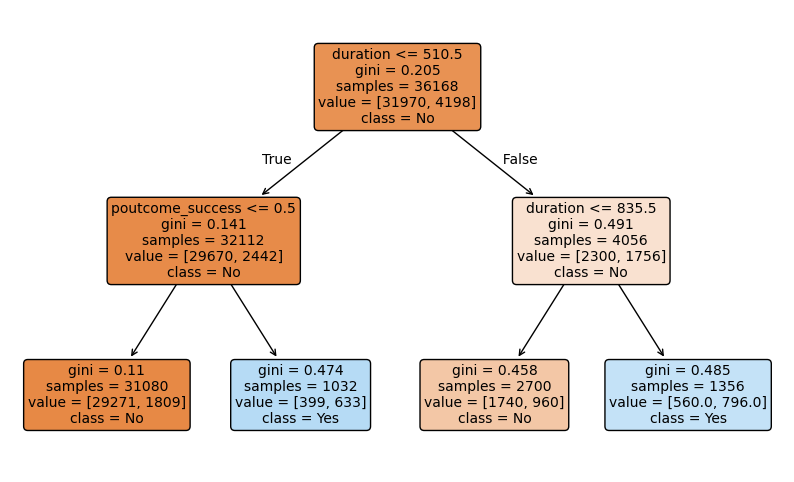

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Simple decision tree
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.show()


Accuracy and classification report evaluate model performance.


## Key Decision Rules (Interpretation)
1. Customers contacted fewer times are more likely to subscribe.
2. Longer call duration increases subscription probability.
3. Certain job and education categories show higher subscription likelihood.
